# Packages

In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar

pd.set_option ('display.max_columns', None)

# Importing data

In [2]:
# Load data from raw_data
data = np.load('../raw_data/baseline.npz', allow_pickle=True)

# Contents of data

In [3]:
# Display the contents of the .npz file
data.files

['datetime', 'GHI', 'CLS', 'SZA', 'SAA']

In [4]:
# Extract features from data
GHI = data['GHI']
CLS = data['CLS']
SAA = data['SAA']
SZA = data['SZA']
DATE = data['datetime']

In [5]:
# Giving the variables of each feature a name
# For example - GHI[99,:,:,:]

observation = 99 # 1 through 1845
observation_time = 0 # 0, 1, 2, 3, 4, 5, 6, 7, 8
pixel_frame_x = 0 # 81 pixels
pixel_frame_y = 0 # 81 pixels

# Contents of the datetime feature

In [6]:
# Display the contents of the datetime feature
DATE

array([datetime.datetime(2012, 1, 1, 9, 15),
       datetime.datetime(2012, 1, 1, 11, 15),
       datetime.datetime(2012, 1, 1, 13, 15), ...,
       datetime.datetime(2012, 12, 31, 11, 15),
       datetime.datetime(2012, 12, 31, 13, 15),
       datetime.datetime(2012, 12, 31, 15, 15)], dtype=object)

In [7]:
type(DATE)

numpy.ndarray

In [8]:
DATE.shape

(1845,)

In [9]:
index = ["5:45","6:00","6:15","6:30","6:45","7:00","7:15","7:30","7:45", "8:00", "8:15","8:30", "8:45", "9:00", "9:15", "9:30", "9:45", "10:00", "10:15", "10:30", "10:45", "11:00","11:15", "11:30", "11:45" , "12:00", "12:15", "12:30", "12:45", "13:00", "13:15", "13:30", "13:45", "14:00", "14:15", "14:30", "14:45", "15:00", "15:15", "15:30", "15:45", "16:00", "16:15", "16:30", "16:45", "17:00" , "17:15", "17:30", "17:45", "18:00", "18:15"]

a = ["n/a","n/a","n/a","n/a","n/a","n/a", "n/a","n/a","n/a", "n/a","n/a","a", "a","a","9:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a", "11:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","13:15","tbp", "tbp", "tbp","tbp", "a", "a", "a", "15:15", "tbp", "tbp", "tbp", "tbp", "n/a","n/a", "n/a", "n/a", "n/a", "n/a","n/a","n/a"]
b = ["n/a","n/a","n/a","n/a", "n/a","n/a", "n/a","n/a","n/a", "n/a","a","a","a", "9:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","11:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","13:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","15:00", "tbp", "tbp", "tbp", "tbp", "n/a", "n/a","n/a", "n/a", "n/a", "n/a", "n/a","n/a","n/a"]
c = ["n/a","n/a","n/a","n/a","n/a","n/a", "n/a","n/a","n/a", "a","a","a", "8:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:45","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:45", "tbp", "tbp", "tbp", "tbp", "n/a", "n/a", "n/a","n/a", "n/a", "n/a", "n/a", "n/a","n/a","n/a"]
d = ["n/a","n/a","n/a","n/a", "n/a","n/a", "n/a","n/a","a", "a","a","8:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:30","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","16:30", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a"]
e = ["n/a","n/a", "n/a","n/a","n/a","n/a", "n/a","a", "a","a","8:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:15","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","16:15", "tbp", "tbp", "tbp", "tbp", "n/a", "n/a","n/a","n/a"]
f = ["n/a","n/a", "n/a","n/a","n/a","n/a","a", "a","a","8:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:00","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","16:00", "tbp", "tbp", "tbp", "tbp", "n/a","n/a", "n/a","n/a","n/a"]
g = ["n/a","n/a","n/a", "n/a","n/a","a", "a","a","7:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","9:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","11:45","tbp", "tbp", "tbp","tbp", "a", "a", "a", "13:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","15:45", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a", "n/a","n/a","n/a"]
h = ["n/a","n/a","n/a","n/a", "a", "a","a","7:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","9:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","11:30","tbp", "tbp", "tbp","tbp", "a", "a", "a", "13:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","15:30", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a","n/a", "n/a","n/a","n/a"]
i = ["n/a","n/a","n/a", "a","a","a","7:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","9:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","11:15","tbp", "tbp", "tbp","tbp", "a", "a", "a", "13:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","15:15", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a","17:15", "tbp", "tbp", "tbp", "tbp"]
l = ["n/a", "n/a","a","a","a","7:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","9:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","11:00","tbp", "tbp", "tbp","tbp", "a", "a", "a", "13:00", "tbp", "tbp", "tbp","tbp", "a", "a", "a","15:00", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a","17:00", "tbp", "tbp", "tbp", "tbp", "n/a"]
m = ["n/a","a", "a","a","6:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","8:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:45","tbp", "tbp", "tbp","tbp", "a", "a", "a", "12:45", "tbp", "tbp", "tbp","tbp", "a", "a", "a","14:45", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a","16:45", "tbp", "tbp", "tbp", "tbp", "n/a", "n/a"]
n = ["a", "a","a","6:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","8:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:30","tbp", "tbp", "tbp","tbp", "a", "a", "a", "12:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","14:30", "tbp", "tbp", "tbp", "tbp", "n/a","n/a","n/a","16:30", "tbp", "tbp", "tbp", "tbp", "n/a", "n/a","n/a" ]
o = ["n/a","n/a", "n/a","n/a","n/a","n/a", "n/a","a", "a","a","8:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:15","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:15", "tbp", "tbp", "tbp","tbp", "a", "a", "a","n/a", "n/a", "n/a", "n/a", "n/a", "n/a", "n/a","n/a","n/a"]
p = ["n/a","n/a","n/a","n/a", "n/a","n/a", "n/a","n/a","a", "a","a","8:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","10:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","12:30","tbp", "tbp", "tbp","tbp", "a", "a", "a", "14:30", "tbp", "tbp", "tbp","tbp", "a", "a", "a","n/a", "n/a", "n/a", "n/a", "n/a", "n/a","n/a","n/a"]

to_predict_overview=pd.DataFrame (
    {"01.01 - 21.01":a, 
     "22.01 - 08.02":b, 
     "09.02 - 20.02":c,
     "21.02 - 02.03":d,
     "03.03 - 12.03":e,
     "13.03 - 22.03":f,
     "23.03 - 02.04":g,
     "03.04 - 12.04":h,
     "13.04 - 24.04":i,
     "25.04 - 09.05":l,
     "10.05 - 06.06":m,
     "07.06 - 17.06":n,
     "18.06 - 20.07":m,
     "21.07 - 10.08":l,
     "10.08 - 28.08":i,
     "29.08 - 16.09":h,
     "17.09 - 4.10":g,
     "5.10 - 20.10":f,
     "21.10 - 3.11":o,
     "4.11 - 16.11":p,
     "17.11 - 30.11":c,
     "01.12 - 18.12":b,
     "19.12 - 31.12":a},
    index=index)

to_predict_overview

,01.01 - 21.01,22.01 - 08.02,09.02 - 20.02,21.02 - 02.03,03.03 - 12.03,13.03 - 22.03,23.03 - 02.04,03.04 - 12.04,13.04 - 24.04,25.04 - 09.05,10.05 - 06.06,07.06 - 17.06,18.06 - 20.07,21.07 - 10.08,10.08 - 28.08,29.08 - 16.09,17.09 - 4.10,5.10 - 20.10,21.10 - 3.11,4.11 - 16.11,17.11 - 30.11,01.12 - 18.12,19.12 - 31.12
5:45,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a
6:00,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,a,a,a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a
6:15,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,a,a,a,a,a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a
6:30,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,a,a,a,6:30,a,a,a,n/a,n/a,n/a,n/a,n/a,n/a,n/a,n/a
6:45,n/a,n/a,n/a,n/a,n/a,n/a,n/a,a,a,a,6:45,tbp,6:45,a,a,a,n/a,n/a,n/a,n/a,n/a,n/a,n/a
7:00,n/a,n/a,n/a,n/a,n/a,n/a,a,a,a,7:00,tbp,tbp,tbp,7:00,a,a,a,n/a,n/a,n/a,n/a,n/a,n/a
7:15,n/a,n/a,n/a,n/a,n/a,a,a,a,7:15,tbp,tbp,tbp,tbp,tbp,7:15,a,a,a,n/a,n/a,n/a,n/a,n/a
7:30,n/a,n/a,n/a,n/a,a,a,a,7:30,tbp,tbp,tbp,tbp,tbp,tbp,tbp,7:30,a,a,a,n/a,n/a,n/a,n/a
7:45,n/a,n/a,n/a,a,a,a,7:45,tbp,tbp,tbp,tbp,a,tbp,tbp,tbp,tbp,7:45,a,a,a,n/a,n/a,n/a
8:00,n/a,n/a,a,a,a,8:00,tbp,tbp,tbp,tbp,a,a,a,tbp,tbp,tbp,tbp,8:00,a,a,a,n/a,n/a


In [10]:
def number_of_observations(actual_day):
    
    dx = datetime.datetime.strptime(actual_day, "%d-%m-%Y")
    dx = dx.date()

    d1 = datetime.date(2012,1,1)
    d2 = datetime.date(2012,2,20)
    d3 = datetime.date(2012,4,12)
    d4 = datetime.date(2012,8,28)
    d5 = datetime.date(2012,10,20)
    d6 = datetime.date(2012,12,31)
    
    obs = 0
    
    if dx>=d1 and dx<=d2:
        obs=4    
    elif dx>d2 and dx<=d3:
        obs=5
    elif dx>d3 and dx<=d4:
        obs=6
    elif dx>d4 and dx<=d5:
        obs=5
    elif dx>d5 and dx<=d6:
        obs=4

    if obs!=0:
        return (f"The number of observation per day is {obs}.")
    else:
        return ("The date out of range.")

In [11]:
number_of_observations('21-06-2012')

'The number of observation per day is 6.'

In [12]:
number_of_observations('21-01-2012')

'The number of observation per day is 4.'

In [13]:
number_of_observations('21-01-2013')

'The date out of range.'

In [14]:
def date_index(actual_day):
    
    riv = data['datetime']
    date_format = []
    
    for i in range(riv.shape[0]):
        date_format.append(riv[i].date()) 
    
    dx = datetime.datetime.strptime(actual_day, "%d-%m-%Y")
    dx = dx.date()
   
    index = []
    
    for i in range(riv.shape[0]):
        if dx == date_format[i]:
            index.append(i)
    
    if not index:
        return ("The date out of range.")
    else:
        return index

In [15]:
date_index('21-06-2012')

[878, 879, 880, 881, 882, 883]

In [16]:
date_index('21-01-2012')

[80, 81, 82, 83]

In [17]:
date_index('21-01-2013')

'The date out of range.'

# Contents of the GHI feature

In [18]:
type(GHI)

numpy.ndarray

In [19]:
GHI.shape

(1845, 4, 81, 81)

In [20]:
# Finding vmin and vmax for the feature

min_values_GHI = []
max_values_GHI = []

for x in GHI[observation,observation_time,:,:]:
    min_values_GHI.append(np.min(x))
    max_values_GHI.append(np.max(x))

vmin_ghi = np.min(min_values_GHI)
vmax_ghi = np.max(max_values_GHI)  

print(vmin_ghi)
print(vmax_ghi)

138.03
536.55


In [21]:
# Printing the smallest and largest values of the (81 x 81) pixel frames for 25th Jan at 3 pm
print(DATE[99])
print(GHI[100,3,:,:].shape)
print (vmin_ghi)
print (vmax_ghi)

2012-01-25 15:00:00
(81, 81)
138.03
536.55


(1845,)
(1845,)


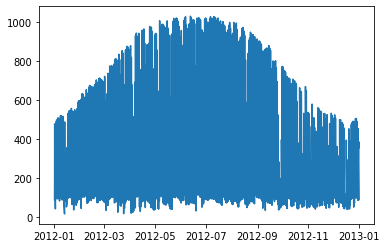

In [22]:
# Looking at GHI throughout the year

x_axis = DATE # datetime
y_axis = GHI[:,0,0,0] # cls

print(x_axis.shape)
print(y_axis.shape)

plt.plot(x_axis, y_axis)

In [23]:
# Making data accessible to view in pandas
tot = 0
stat = []

for x in range(GHI.shape[0]):
    for y in range(GHI.shape[1]):
        for z in range(GHI.shape[2]):
            for t in range (GHI.shape[3]):
                stat.append(GHI[x,y,z,t])
                if type(GHI[x,y,z,t]) != np.float64:
                    tot+=1

print(tot)

df_ghi = pd.DataFrame(stat, columns = ['GHI'])

print(df_ghi.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48420180 entries, 0 to 48420179
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   GHI     float64
dtypes: float64(1)
memory usage: 369.4 MB
None


In [24]:
df_ghi.describe()

,GHI
count,4.842018e+07
mean,4.949039e+02
std,2.737931e+02
min,8.040000e+00
25%,2.507800e+02
50%,4.926200e+02
75%,7.184500e+02
max,1.101740e+03


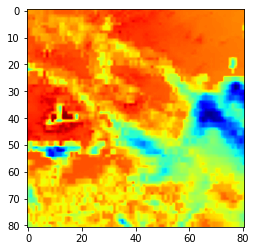

In [27]:
# Displaying one observation

plt.imshow(
    GHI[
        observation, 
        observation_time,
        :,
        :], 
    cmap='jet', 
   # norm='linear', 
    vmin=vmin_ghi, 
    vmax=vmax_ghi)

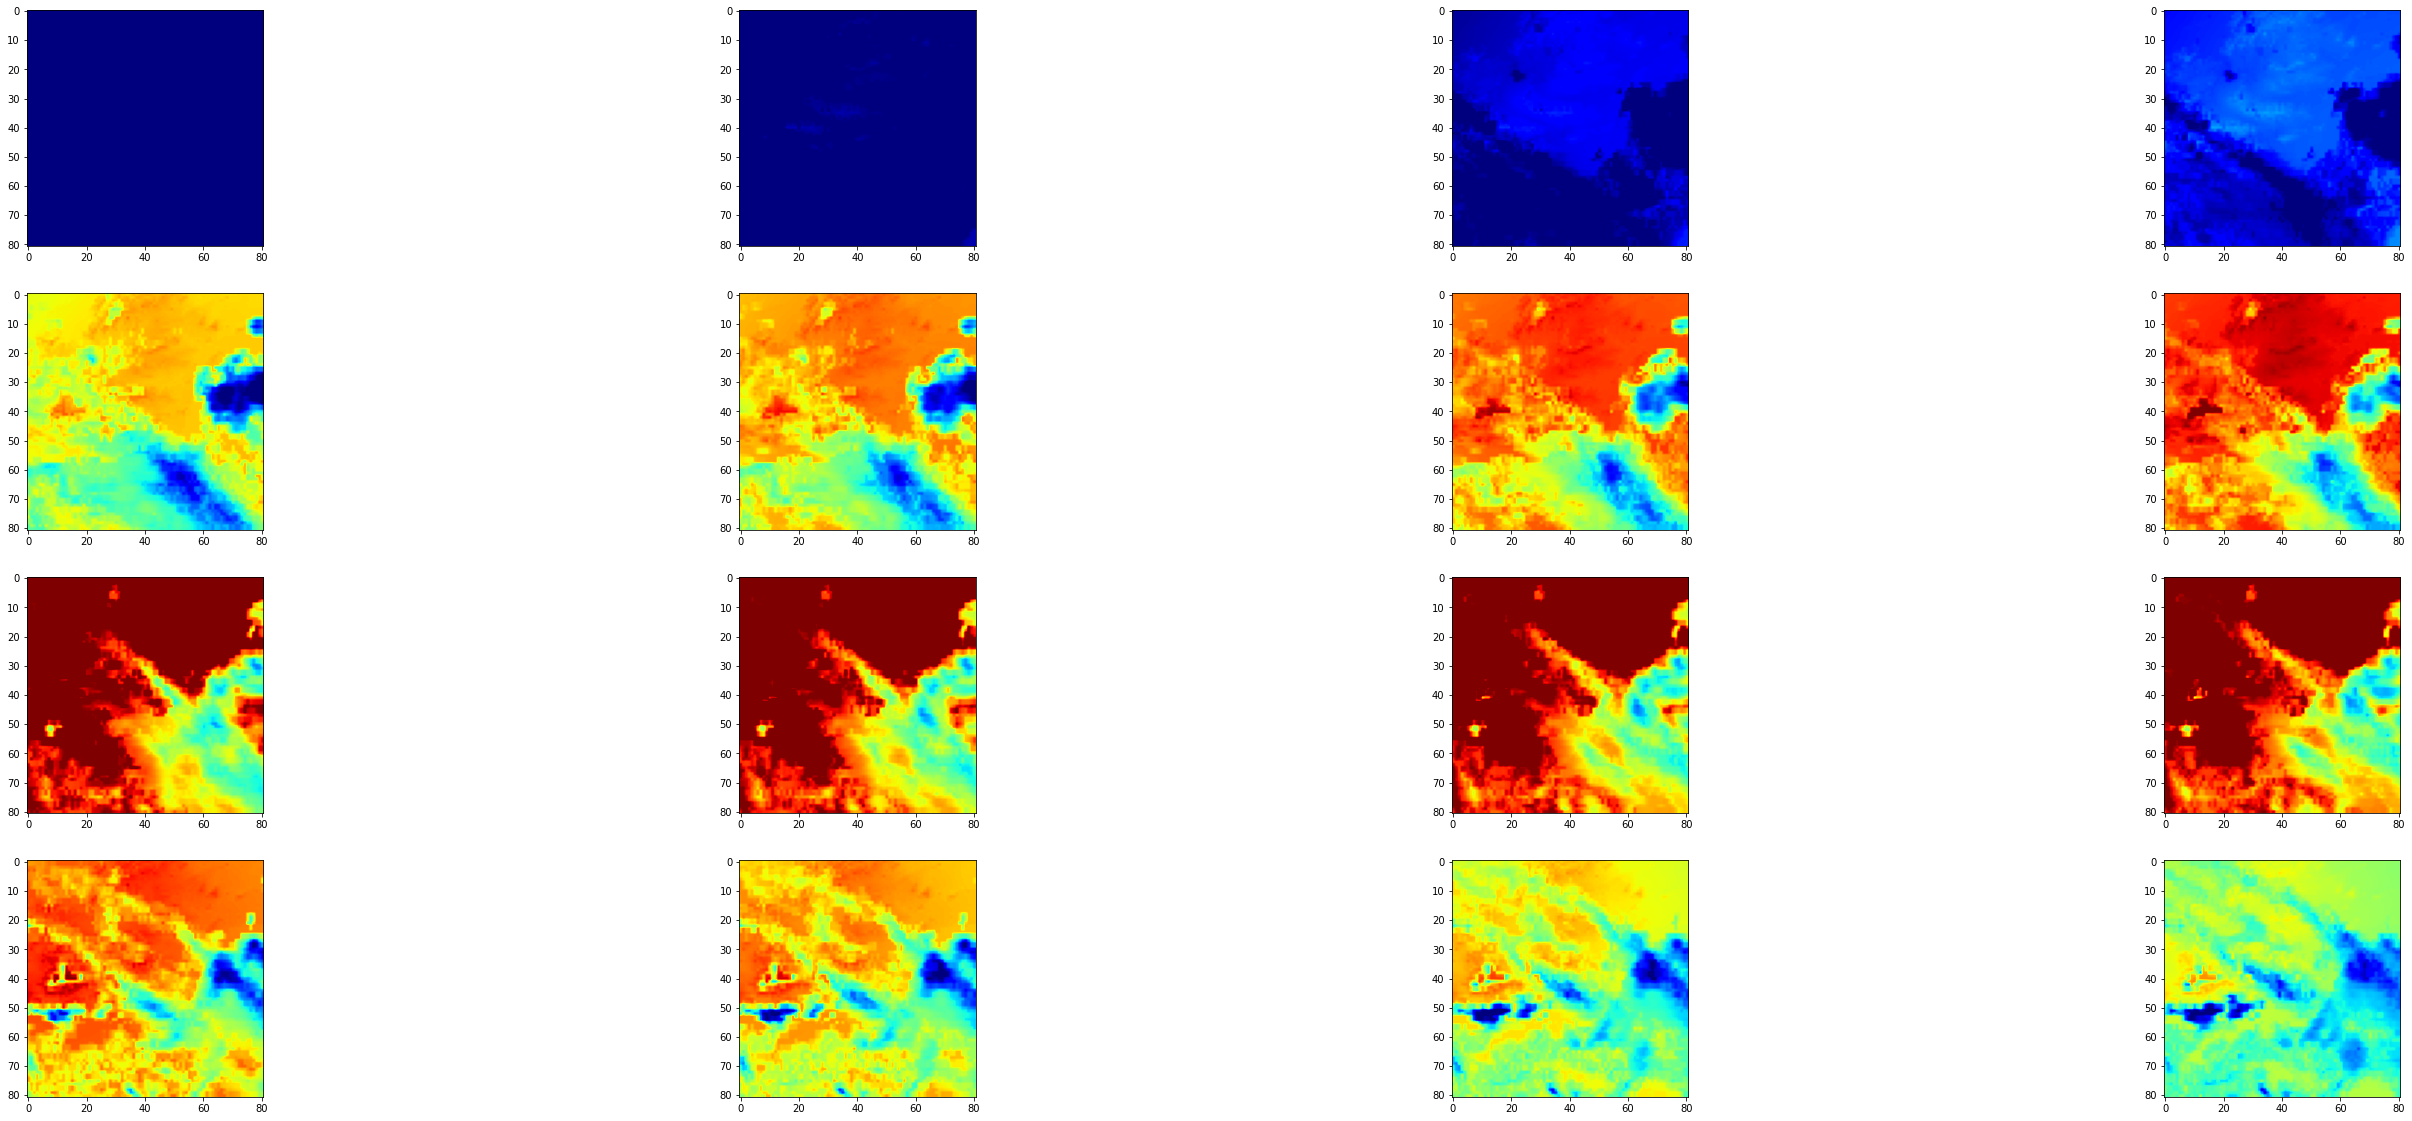

In [28]:
# Displaying a full day

plt.figure (figsize = (100,20))

for j in range(4):
    for i in range(4):
        plt.subplot(4, 8, j * 8 + i + 1)
        plt.imshow(GHI[96+j,i,:,:], cmap='jet', vmin=vmin_ghi, vmax=vmax_ghi)

# Contents of the CLS feature

In [29]:
type(CLS)

numpy.ndarray

In [30]:
CLS.shape

(1845, 8, 81, 81)

In [34]:
# Finding vmin and vmax for the feature

min_values_CLS = []
max_values_CLS = []

for x in CLS[observation,observation_time,:,:]:
    min_values_CLS.append(np.min(x))
    max_values_CLS.append(np.max(x))

vmin_cls = np.min(min_values_CLS)
vmax_cls = np.max(max_values_CLS)  

print(vmin_cls)
print(vmax_cls)

462.74
565.4


(1845,)
(1845,)


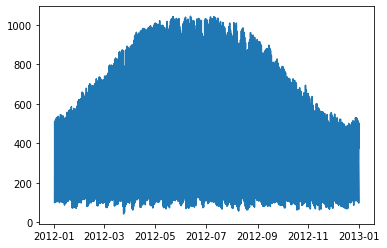

In [35]:
# Looking at GHI throughout the year

x_axis = DATE # datetime
y_axis = CLS[:,0,0,0] # cls

print(x_axis.shape)
print(y_axis.shape)

plt.plot(x_axis, y_axis)

In [36]:
# Making data accessible to view in pandas
tot = 0
stat = []

for x in range(CLS.shape[0]):
    for y in range(CLS.shape[1]):
        for z in range(CLS.shape[2]):
            for t in range (CLS.shape[3]):
                stat.append(CLS[x,y,z,t])
                if type(CLS[x,y,z,t]) != np.float64:
                    tot+=1

print(tot)

df_cls = pd.DataFrame(stat, columns = ['CLS'])

print(df_cls.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96840360 entries, 0 to 96840359
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   CLS     float64
dtypes: float64(1)
memory usage: 738.8 MB
None


In [37]:
df_cls.describe()

,CLS
count,9.684036e+07
mean,5.724999e+02
std,2.527511e+02
min,2.987000e+01
25%,3.766500e+02
50%,5.639200e+02
75%,7.833400e+02
max,1.121730e+03


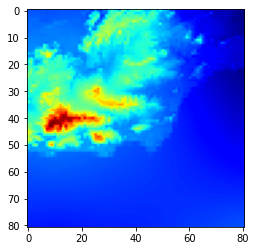

In [39]:
# Displaying one observation

plt.imshow(
    CLS[
        observation, 
        observation_time,
        :,
        :], 
    cmap='jet', 
    #norm='linear', 
    vmin=vmin_cls, 
    vmax=vmax_cls)

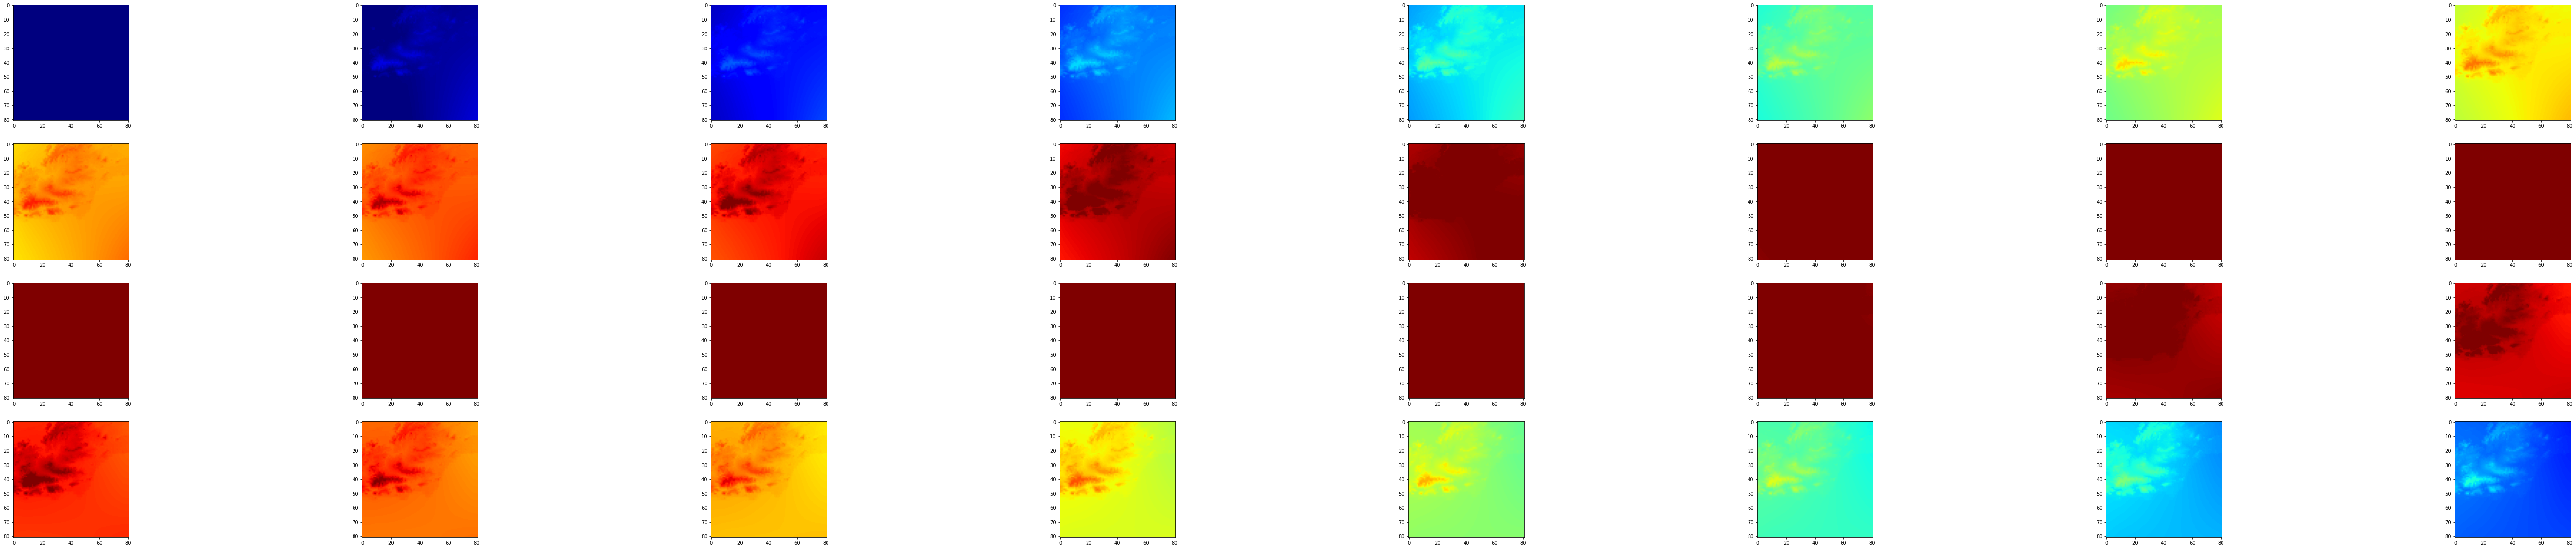

In [40]:
plt.figure (figsize = (100,20))

for j in range(4):
    for i in range(8):
        plt.subplot(4, 8, j * 8 + i + 1)
        plt.imshow(CLS[96+j,i,:,:], cmap='jet', vmin=vmin_ghi, vmax=vmax_ghi)

# Contents of the angles feature

In [41]:
# Displaying mean angles for March, June, September and December

mean_SAA_mar = []
mean_SZA_mar = []
mean_SAA_jun = []
mean_SZA_jun = []
mean_SAA_dic = []
mean_SZA_dic = []


for j in range (349,354):
    for i in range(8):
        mean_SAA_mar.append(90-(round((SAA[j,i,0,0]).mean(),2)))
        mean_SZA_mar.append((round((SZA[j,i,0,0]).mean(),2)))

for j in range (878,884):
    for i in range(8):
        mean_SAA_jun.append(90-(round((SAA[j,i,0,0]).mean(),2)))
        mean_SZA_jun.append((round((SZA[j,i,0,0]).mean(),2)))

for j in range (1801,1805):
    for i in range(8):
        mean_SAA_dic.append(90-(round((SAA[j,i,0,0]).mean(),2)))
        mean_SZA_dic.append((round((SZA[j,i,0,0]).mean(),2)))

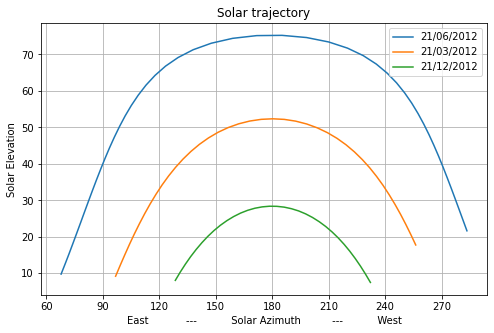

In [42]:
# Displaying the solar trajectory on the 21 of March, 2012

plt.figure(figsize=(8,5))
plt.title("Solar trajectory")
plt.ylabel("Solar Elevation")
plt.xlabel("East            ---           Solar Azimuth          ---           West")
plt.xticks([60,90,120, 150, 180, 210, 240, 270, 300])
plt.grid()
plt.plot(mean_SZA_jun,mean_SAA_jun, label="21/06/2012")
plt.plot(mean_SZA_mar,mean_SAA_mar, label="21/03/2012")
plt.plot(mean_SZA_dic,mean_SAA_dic, label="21/12/2012")
plt.legend(loc="upper right")